In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.datasets import load_iris

In [2]:
def plotting_function(fitted_model, X, y, ax):
    # Scatterplot the data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)

    # Create a grid to evaluate the classifier
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = fitted_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    # Highlight the support vectors
    ax.scatter(fitted_model.support_vectors_[:, 0], fitted_model.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    return scatter

# Optimal Separating Hyperplanes

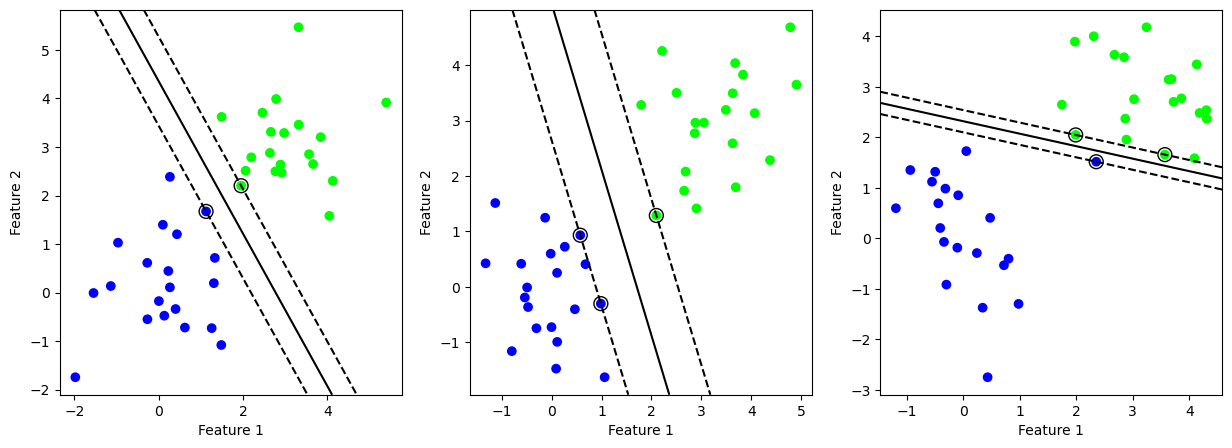

In [3]:
np.random.seed(10)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    # Generate synthetic data
    X = np.r_[np.random.randn(20, 2), np.random.randn(20, 2) + [3, 3]]
    y = [0] * 20 + [1] * 20

    # Fit the SVC
    clf = SVC(kernel='linear', C=10000)
    clf.fit(X, y)

    plotting_function(clf, X, y, axes[i])
plt.show()

# Linear SVMs

#### Linearly separable dataset

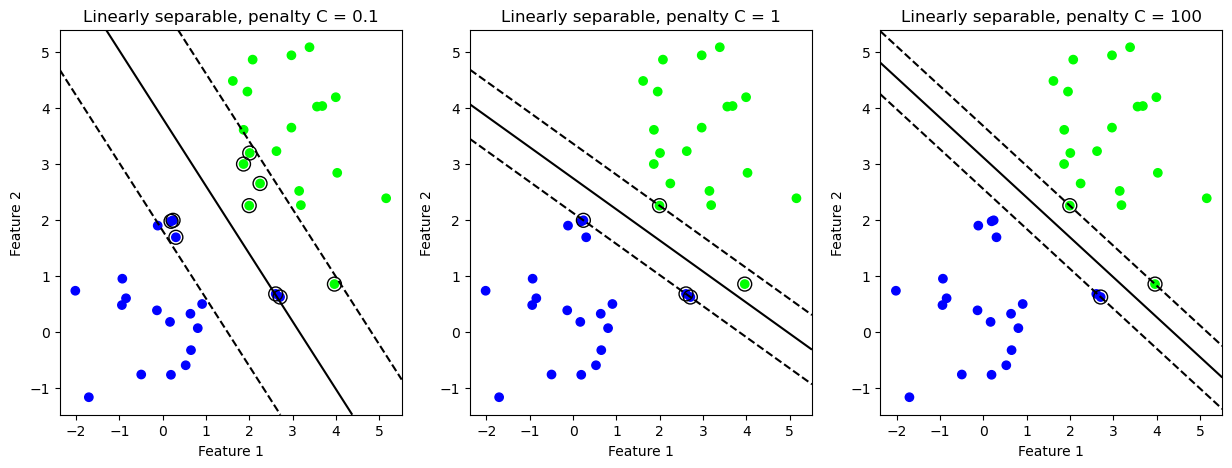

In [4]:
np.random.seed(101)

# Generate synthetic data
X = np.r_[np.random.randn(20, 2), np.random.randn(20, 2) + [3, 3]]
y = [0] * 20 + [1] * 20

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, C in enumerate([0.1, 1, 100]):
    # Fit the SVC
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    plotting_function(clf, X, y, ax=axes[i])
    axes[i].set_title(f"Linearly separable, penalty C = {C}")
plt.show()

#### Non-linearly separable dataset

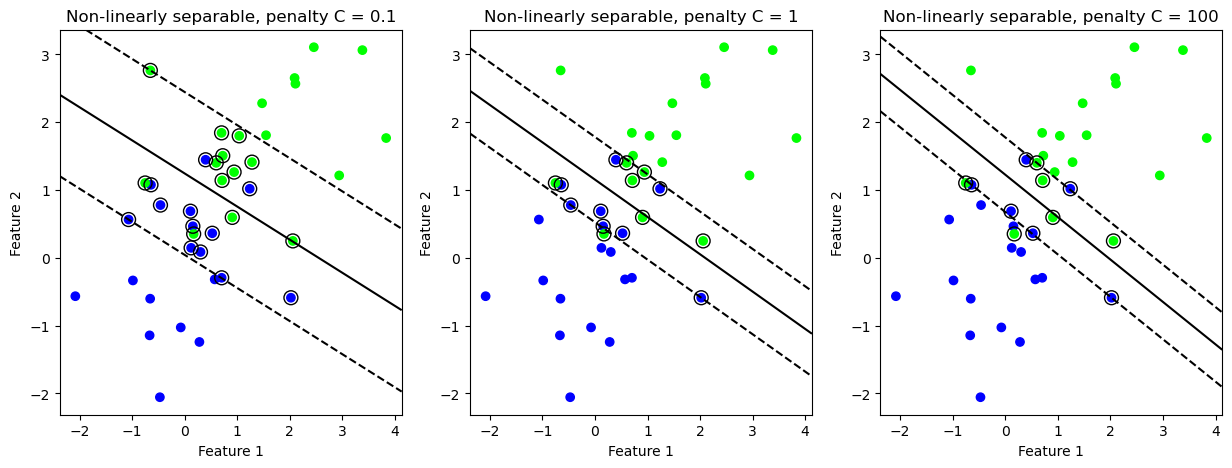

In [5]:
np.random.seed(505)

# Generate synthetic data
X = np.r_[np.random.randn(20, 2), np.random.randn(20, 2) + [1.5, 1.5]]
y = [0] * 20 + [1] * 20

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, C in enumerate([0.1, 1, 100]):
    # Fit the SVC
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    plotting_function(clf, X, y, ax=axes[i])
    axes[i].set_title(f"Non-linearly separable, penalty C = {C}")
plt.show()

# Multiclass Support Vector Classification 

In [6]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_name'] = iris.target_names[iris.target]
# Print a random sample of 10 rows to see the data
iris_df.sample(len(iris_df)).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
39,5.1,3.4,1.5,0.2,0,setosa
12,4.8,3.0,1.4,0.1,0,setosa
66,5.6,3.0,4.5,1.5,1,versicolor
5,5.4,3.9,1.7,0.4,0,setosa
63,6.1,2.9,4.7,1.4,1,versicolor
31,5.4,3.4,1.5,0.4,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
22,4.6,3.6,1.0,0.2,0,setosa
114,5.8,2.8,5.1,2.4,2,virginica


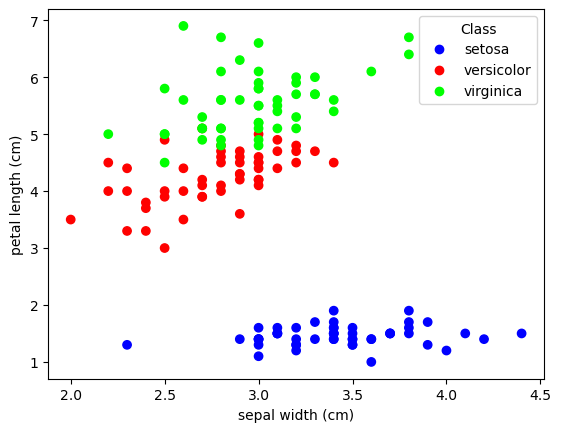

In [7]:
X, y = iris["data"], iris["target"]

# Keep only 2 features to make visualization easier
feature_1, feature_2 = 1, 2
X = X[:, [feature_1, feature_2]]

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
plt.xlabel(iris.feature_names[feature_1])
plt.ylabel(iris.feature_names[feature_2])
plt.legend(scatter.legend_elements()[0], iris.target_names, title="Class")
plt.show()

## One vs. Rest

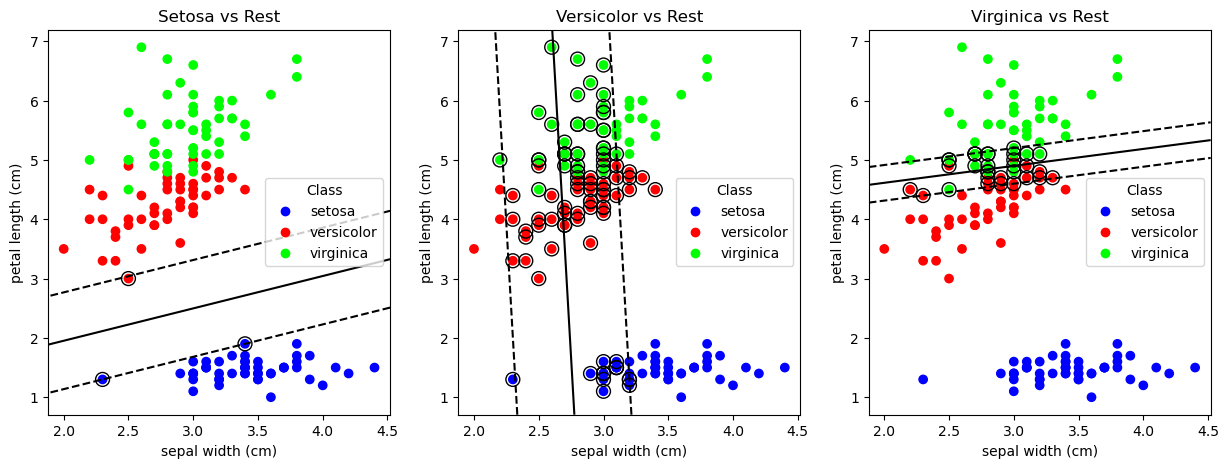

Coefficients for Setosa vs Rest: [[ 0.66878989 -1.22611461]]
Support vectors for Setosa vs Rest: [[2.5, 3.0], [3.4, 1.9], [2.3, 1.3]]


In [8]:
clf = OneVsRestClassifier(SVC(kernel='linear'), n_jobs=-1)
clf.fit(X, y)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

titles = ["Setosa vs Rest", "Versicolor vs Rest", "Virginica vs Rest"]
for i, c in enumerate(clf.estimators_):
    plot = plotting_function(c, X, y, ax=axes[i])
    axes[i].set_xlabel(iris.feature_names[feature_1])
    axes[i].set_ylabel(iris.feature_names[feature_2])
    axes[i].legend(scatter.legend_elements()[0], iris.target_names, title="Class")
    axes[i].set_title(titles[i])
plt.show()

# Parameters and support vectors for one of the classifiers
example_model = 0
print(f"Coefficients for {titles[example_model]}:", clf.estimators_[example_model].coef_)
print(f"Support vectors for {titles[example_model]}:", clf.estimators_[example_model].support_vectors_.tolist())

## One vs. One

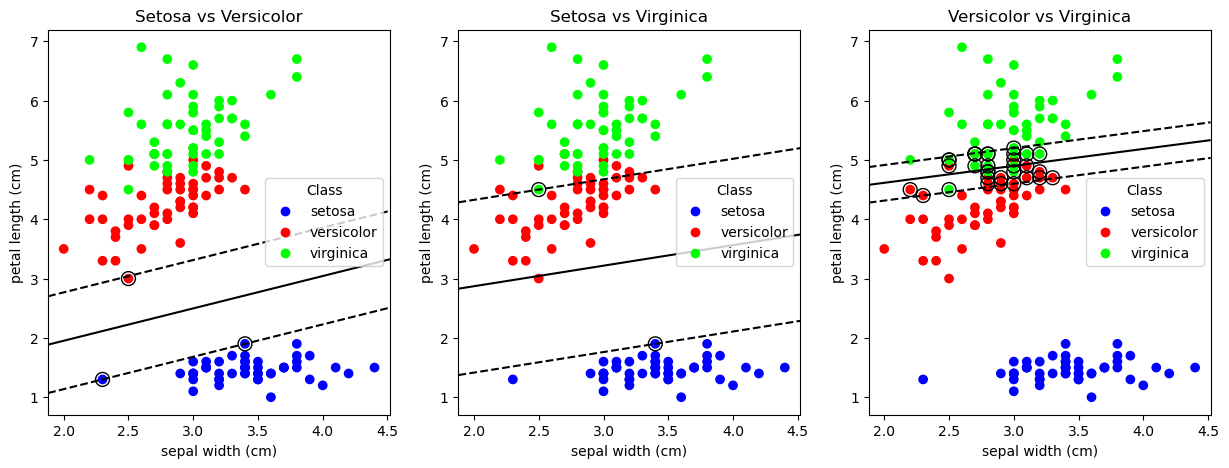

Coefficients for Setosa vs Virginica: [[-0.23778066  0.68692192]]
Support vectors for Setosa vs Virginica: [[3.4, 1.9], [2.5, 4.5]]


In [9]:
clf = OneVsOneClassifier(SVC(kernel='linear'), n_jobs=-1)
clf.fit(X, y)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

titles = ["Setosa vs Versicolor", "Setosa vs Virginica", "Versicolor vs Virginica"]
for i, c in enumerate(clf.estimators_):
    plot = plotting_function(c, X, y, ax=axes[i])
    axes[i].set_xlabel(iris.feature_names[feature_1])
    axes[i].set_ylabel(iris.feature_names[feature_2])
    axes[i].set_title(titles[i])
    axes[i].legend(scatter.legend_elements()[0], iris.target_names, title="Class")
plt.show()

# Parameters and support vectors for one of the classifiers
example_model = 1
print(f"Coefficients for {titles[example_model]}:", clf.estimators_[example_model].coef_)
print(f"Support vectors for {titles[example_model]}:", clf.estimators_[example_model].support_vectors_.tolist())